In [1]:
%matplotlib inline

import tensorflow as tf
import time
import matplotlib.pyplot as plt
old_v = tf.logging.get_verbosity()
tf.logging.set_verbosity(tf.logging.ERROR)

<h2>Extract MNIST data</h2>
<p style="font-size:20px">You can change the option of one_hot encoding.

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
#get mnist data, with one_hot encoding
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)
#suppress warnings
tf.logging.set_verbosity(old_v)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
num_train = mnist.train.num_examples #55,000
num_validation = mnist.validation.num_examples #5000
num_test = mnist.test.num_examples #10,000

<h2>Define hyperparameters</h2>

In [4]:
#learning rate
lr = 0.01

#network parameters
n_hidden_1 = 100
num_input = 784
num_classes = 10

In [5]:
tf.reset_default_graph()

<h2>Define placeholder and Variables</h2>

In [6]:
#tf graph input
X = tf.placeholder(tf.float32,[None,num_input],name='X')
Y = tf.placeholder(tf.int32,[None,num_classes],name='Y')

#Layers weight & bias
weights = {
    'W1': tf.Variable(tf.random_normal([num_input, n_hidden_1]),name='W1'),
    'Wout': tf.Variable(tf.random_normal([n_hidden_1, num_classes]),name='Wout')
}

biases = {
    'b1': tf.Variable(tf.zeros(shape=[n_hidden_1]),name='b1'),
    'bout': tf.Variable(tf.zeros(shape=[num_classes]),name='bout')
}

Instructions for updating:
Colocations handled automatically by placer.


<h2>Define neural network</h2>

In [7]:
#define a neural net model
def neural_net(x):
    layer_1_out = tf.nn.relu(tf.add(tf.matmul(x,weights['W1']),biases['b1']))
    out = tf.add(tf.matmul(layer_1_out,weights['Wout']),biases['bout'])
    return out

<h2>Define cost function and accuracy</h2>

In [8]:
#predicted labels
logits = neural_net(X)

#define loss
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y),name='loss')
#define optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
train_op = optimizer.minimize(loss)

#compare the predicted labels with true labels
correct_pred = tf.equal(tf.argmax(logits,1),tf.argmax(Y,1))

#compute the accuracy by taking average
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')

#Initialize the variables
init = tf.global_variables_initializer()

<h2>Execute training</h2>

Epoch 0.0, Train Accuracy= 0.062
Epoch 0.0, Valid Accuracy= 0.121
Epoch 1.0, Train Accuracy= 0.812
Epoch 1.0, Valid Accuracy= 0.858
Epoch 2.0, Train Accuracy= 0.938
Epoch 2.0, Valid Accuracy= 0.881
Epoch 3.0, Train Accuracy= 0.812
Epoch 3.0, Valid Accuracy= 0.892
Epoch 4.0, Train Accuracy= 1.000
Epoch 4.0, Valid Accuracy= 0.892
Epoch 5.0, Train Accuracy= 1.000
Epoch 5.0, Valid Accuracy= 0.896
Epoch 6.0, Train Accuracy= 1.000
Epoch 6.0, Valid Accuracy= 0.904
Epoch 7.0, Train Accuracy= 1.000
Epoch 7.0, Valid Accuracy= 0.903
Epoch 8.0, Train Accuracy= 1.000
Epoch 8.0, Valid Accuracy= 0.908
Epoch 9.0, Train Accuracy= 0.938
Epoch 9.0, Valid Accuracy= 0.913
Training finished!
Testing Accuracy: 89.5900011062622 %
Took 27.421378 s


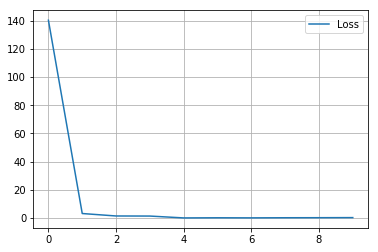

In [9]:
# Mini-batch size = 16

loss_log = []

start = time.time()

with tf.Session() as sess:
    sess.run(init)
    
    for i in range(int(num_train/16.) * 10):
        #fetch batch
        batch_x, batch_y = mnist.train.next_batch(16)
        
        #run optimization
        _, c = sess.run([train_op, loss], feed_dict={X:batch_x, Y:batch_y})
        if i % int(num_train/16.) ==0:
            acc_train = sess.run(accuracy,feed_dict={X:batch_x, Y:batch_y})
            acc_valid = sess.run(accuracy,feed_dict={X:mnist.validation.images, Y:mnist.validation.labels})
            print("Epoch "+str(i/int(num_train/16.))+", Train Accuracy= {:.3f}".format(acc_train))
            print("Epoch "+str(i/int(num_train/16.))+", Valid Accuracy= {:.3f}".format(acc_valid))
            loss_log.append(c)
    
    print("Training finished!")
    
    print("Testing Accuracy:", sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels}) * 100, "%")
    
end = time.time()
print("Took %f s" % ((end - start)))

plt.plot(loss_log,label='Loss')
#plt.plot(val_log,label='val accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()    

Epoch 0.0, Train Accuracy= 0.141
Epoch 0.0, Valid Accuracy= 0.130
Epoch 1.0, Train Accuracy= 0.891
Epoch 1.0, Valid Accuracy= 0.853
Epoch 2.0, Train Accuracy= 0.938
Epoch 2.0, Valid Accuracy= 0.875
Epoch 3.0, Train Accuracy= 0.875
Epoch 3.0, Valid Accuracy= 0.879
Epoch 4.0, Train Accuracy= 0.906
Epoch 4.0, Valid Accuracy= 0.889
Epoch 5.0, Train Accuracy= 0.938
Epoch 5.0, Valid Accuracy= 0.892
Epoch 6.0, Train Accuracy= 0.891
Epoch 6.0, Valid Accuracy= 0.903
Epoch 7.0, Train Accuracy= 0.875
Epoch 7.0, Valid Accuracy= 0.906
Epoch 8.0, Train Accuracy= 0.938
Epoch 8.0, Valid Accuracy= 0.910
Epoch 9.0, Train Accuracy= 0.953
Epoch 9.0, Valid Accuracy= 0.913
Training finished!
Testing Accuracy: 90.64000248908997 %
Took 30.431023 s


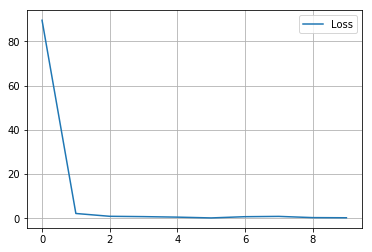

In [10]:
# Mini-batch size = 64

loss_log = []

start = time.time()

with tf.Session() as sess:
    sess.run(init)
    
    for i in range(int(num_train/16.) * 10):
        #fetch batch
        batch_x, batch_y = mnist.train.next_batch(64)
        
        #run optimization
        _, c = sess.run([train_op, loss], feed_dict={X:batch_x, Y:batch_y})
        if i % int(num_train/16.) ==0:
            acc_train = sess.run(accuracy,feed_dict={X:batch_x, Y:batch_y})
            acc_valid = sess.run(accuracy,feed_dict={X:mnist.validation.images, Y:mnist.validation.labels})
            print("Epoch "+str(i/int(num_train/16.))+", Train Accuracy= {:.3f}".format(acc_train))
            print("Epoch "+str(i/int(num_train/16.))+", Valid Accuracy= {:.3f}".format(acc_valid))
            loss_log.append(c)
    
    print("Training finished!")
    
    print("Testing Accuracy:", sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels}) * 100, "%")
    
end = time.time()
print("Took %f s" % ((end - start)))

plt.plot(loss_log,label='Loss')
#plt.plot(val_log,label='val accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()    

Epoch 0.0, Train Accuracy= 0.078
Epoch 0.0, Valid Accuracy= 0.068
Epoch 1.0, Train Accuracy= 0.852
Epoch 1.0, Valid Accuracy= 0.856
Epoch 2.0, Train Accuracy= 0.863
Epoch 2.0, Valid Accuracy= 0.876
Epoch 3.0, Train Accuracy= 0.926
Epoch 3.0, Valid Accuracy= 0.885
Epoch 4.0, Train Accuracy= 0.906
Epoch 4.0, Valid Accuracy= 0.888
Epoch 5.0, Train Accuracy= 0.910
Epoch 5.0, Valid Accuracy= 0.893
Epoch 6.0, Train Accuracy= 0.906
Epoch 6.0, Valid Accuracy= 0.898
Epoch 7.0, Train Accuracy= 0.934
Epoch 7.0, Valid Accuracy= 0.902
Epoch 8.0, Train Accuracy= 0.930
Epoch 8.0, Valid Accuracy= 0.904
Epoch 9.0, Train Accuracy= 0.883
Epoch 9.0, Valid Accuracy= 0.906
Training finished!
Testing Accuracy: 91.51999950408936 %
Took 42.291286 s


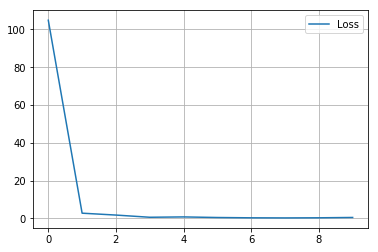

In [11]:
# Mini-batch size = 256

loss_log = []

start = time.time()

with tf.Session() as sess:
    sess.run(init)
    
    for i in range(int(num_train/16.) * 10):
        #fetch batch
        batch_x, batch_y = mnist.train.next_batch(256)
        
        #run optimization
        _, c = sess.run([train_op, loss], feed_dict={X:batch_x, Y:batch_y})
        if i % int(num_train/16.) ==0:
            acc_train = sess.run(accuracy,feed_dict={X:batch_x, Y:batch_y})
            acc_valid = sess.run(accuracy,feed_dict={X:mnist.validation.images, Y:mnist.validation.labels})
            print("Epoch "+str(i/int(num_train/16.))+", Train Accuracy= {:.3f}".format(acc_train))
            print("Epoch "+str(i/int(num_train/16.))+", Valid Accuracy= {:.3f}".format(acc_valid))
            loss_log.append(c)
    
    print("Training finished!")
    
    print("Testing Accuracy:", sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels}) * 100, "%")
    
end = time.time()
print("Took %f s" % ((end - start)))

plt.plot(loss_log,label='Loss')
#plt.plot(val_log,label='val accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()    

Epoch 0.0, Train Accuracy= 0.065
Epoch 0.0, Valid Accuracy= 0.075
Epoch 1.0, Train Accuracy= 0.849
Epoch 1.0, Valid Accuracy= 0.856
Epoch 2.0, Train Accuracy= 0.892
Epoch 2.0, Valid Accuracy= 0.876
Epoch 3.0, Train Accuracy= 0.895
Epoch 3.0, Valid Accuracy= 0.886
Epoch 4.0, Train Accuracy= 0.897
Epoch 4.0, Valid Accuracy= 0.890
Epoch 5.0, Train Accuracy= 0.909
Epoch 5.0, Valid Accuracy= 0.894
Epoch 6.0, Train Accuracy= 0.891
Epoch 6.0, Valid Accuracy= 0.900
Epoch 7.0, Train Accuracy= 0.896
Epoch 7.0, Valid Accuracy= 0.904
Epoch 8.0, Train Accuracy= 0.917
Epoch 8.0, Valid Accuracy= 0.908
Epoch 9.0, Train Accuracy= 0.907
Epoch 9.0, Valid Accuracy= 0.909
Training finished!
Testing Accuracy: 90.79999923706055 %
Took 95.381342 s


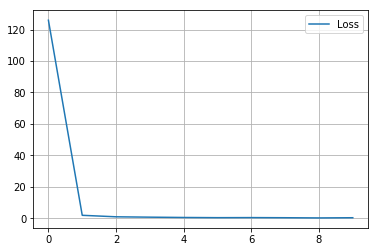

In [12]:
# Mini-batch size = 1024

loss_log = []

start = time.time()

with tf.Session() as sess:
    sess.run(init)
    
    for i in range(int(num_train/16.) * 10):
        #fetch batch
        batch_x, batch_y = mnist.train.next_batch(1024)
        
        #run optimization
        _, c = sess.run([train_op, loss], feed_dict={X:batch_x, Y:batch_y})
        if i % int(num_train/16.) ==0:
            acc_train = sess.run(accuracy,feed_dict={X:batch_x, Y:batch_y})
            acc_valid = sess.run(accuracy,feed_dict={X:mnist.validation.images, Y:mnist.validation.labels})
            print("Epoch "+str(i/int(num_train/16.))+", Train Accuracy= {:.3f}".format(acc_train))
            print("Epoch "+str(i/int(num_train/16.))+", Valid Accuracy= {:.3f}".format(acc_valid))
            loss_log.append(c)
    
    print("Training finished!")
    
    print("Testing Accuracy:", sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels}) * 100, "%")
    
end = time.time()
print("Took %f s" % ((end - start)))

plt.plot(loss_log,label='Loss')
#plt.plot(val_log,label='val accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()    

<h2> Observation </h2>

<h3> We note that tensorflow seems lower the loss faster than numpy version. Also for tensorflow version, the testing accuracy seem to be more consistent throughout the batch size. Finally, unlike numpy version, the training time seems to take longer as the batch size increases </h3>